In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mat
import matplotlib.image as mpimg
import numpy as np
import shutil

import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
from random import shuffle
import torch
from torch.utils.data import DataLoader 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from IPython.core.display import display, HTML

8000


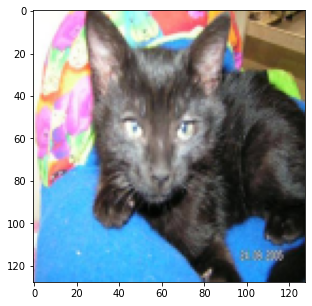

[0]


In [2]:
def show_img(open_cv_image):

    plt.figure(figsize=(5,5))
    plt.imshow(open_cv_image)
    plt.show()
class DatasetForClassify_01:
    def __init__(self,dir_name,flag):
        self.dir_name = dir_name
        self.dir_name_1 = dir_name
        self.flag = flag # 1 - показывать фотографии, 0 - не показывать
        
        
        folder_struct=self.folder2struct(dir_name)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']
        
    def adddir(self,dir_name ):
        self.dir_name_1 = dir_name
        
    def reinit_0(self  ):
        
        folder_struct=self.folder2struct(self.dir_name_1)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']
    def reinit_1(self  ):
        
        folder_struct=self.folder2struct(self.dir_name)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']


    def folder2struct(self,dir_name):
        folder = []
        for folder_ in os.listdir( dir_name):
            folder.append(dir_name+folder_+ '/')
        
        indexes=np.array(range(len(folder)))
        ind_all=[]
        w_array=[]
        for i in indexes:
                   
            files_i = self.photo_shuffle(str(folder[i ]))
            ind_all.append(np.array(files_i))
            w_array.append(len(files_i))
        ind_all=np.array(ind_all)
        w_array=np.array(w_array)        
        l_=sum(w_array)
        folder_struct = {'folder':folder,'w_array':w_array,'l_' : l_,'ind_all' : ind_all}
        return folder_struct

        
        
    def __len__(self):
        
         
        return min(10000,self.l_)


    #Создание списка с фото+шаффл
    def photo_shuffle(self,folder_ ):
        files = []
        for file in os.listdir(folder_   + '/'):
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
                files.append(file)
        shuffle(files)
        #print(self.folder[number])
        return files
    def downscale_2(self,img):
        img = img.astype(np.uint16)
        img = img[:, 0::2] + img[:, 1::2]
        img = img[0::2, :] + img[1::2, :]
        img >>= 2
        return img.astype(np.float)    
    #Ресайзинг
    def resize(self,pimage):
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
        try: 
            bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
            if( bw_.shape[0]== -256 ) and (bw_.shape[1]==256) :

                resize_image = self.downscale_2(bw_)
                #resize_image =  bw_ 
            else:
                resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)


            return resize_image

        except:
            print(pimage)
            return None
            
    
    def random_sample_file(self ):
        i_folder=random.sample(range(len(self.folder)), 1)
        #print('i_folder',i_folder[0])
        i_file=random.sample(range( self.w_array[i_folder[0]]), 1)
        #print('i_file',i_file[0])
        #print('self.folder[i_folder[0]]',self.folder[i_folder[0]])
        file_temp=self.folder[i_folder[0]]+self.ind_all[i_folder[0]][i_file[0]]
        return i_folder,file_temp

    def __getitem__(self,idx):

        i_folder,file_temp=self.random_sample_file()
         
            
        anchor = self.resize(file_temp)
        if anchor is not None:
        

            return {'Anchor':anchor/255,


                   'label': np.array([i_folder[0]])}
        else:
            return{'Anchor':np.random.rand(128,128,3),


                   'label': np.array([1])}
###################################################
dataset1 =DatasetForClassify_01('dataset/training_set/',0) 
dataloader = DataLoader(dataset1, batch_size=3)
l_=dataset1.l_
print(l_)
batch=next(iter(dataloader))
Anchor=batch['Anchor'][0].numpy() 
show_img(Anchor[:,:,:])
 
label_=batch['label'][0].numpy()  
print(label_)


# Импорт Модели

In [16]:
from zz.models.MobileNetV3 import TL_003_mehanit_onnx
IMAGE_SIZE = [128, 128, 3] 
TL_001 = TL_003_mehanit_onnx(imageSize = IMAGE_SIZE, last_activate='linear', device='cuda',numclasses=670 ,show=0)
TL_001.compile(criterion='000', optimizer='adam', lr=0.0001, momentum=0.5) 
#TL_001.load_state('TL_01.pt')
TL_001.load_state('weights/cat_dogs_mobileNet.pt')      
TL_001.eval()
TL_001.summary() 


Loading preset weights... Ok.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Lambda-1          [-1, 1, 128, 128]               0
     Normalization-2          [-1, 3, 128, 128]               0
            Conv2d-3           [-1, 16, 64, 64]             432
       BatchNorm2d-4           [-1, 16, 64, 64]              32
         Hardswish-5           [-1, 16, 64, 64]               0
            Conv2d-6           [-1, 16, 64, 64]             144
       BatchNorm2d-7           [-1, 16, 64, 64]              32
              ReLU-8           [-1, 16, 64, 64]               0
            Conv2d-9           [-1, 16, 64, 64]             256
      BatchNorm2d-10           [-1, 16, 64, 64]              32
         Identity-11           [-1, 16, 64, 64]               0
 InvertedResidual-12           [-1, 16, 64, 64]               0
           Conv2d-13           [-1, 64, 64, 64]           1,024
      Ba

# test

2000


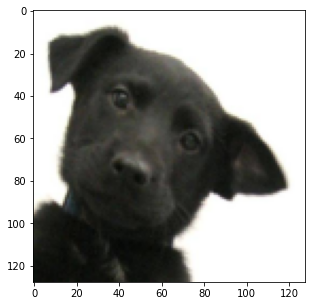

[1]
[[0.9997824]]


In [27]:
dataset1 =DatasetForClassify_01('dataset/test_set/',0) 
dataloader = DataLoader(dataset1, batch_size=5)
l_=dataset1.l_
print(l_)
batch=next(iter(dataloader))
Anchor=batch['Anchor'][0].numpy() 
show_img(Anchor[:,:,:])
 
label_=batch['label'][0].numpy()  
print(label_)
predict=TL_001(np.expand_dims(Anchor,0))
print(predict)

# График метрики

2000


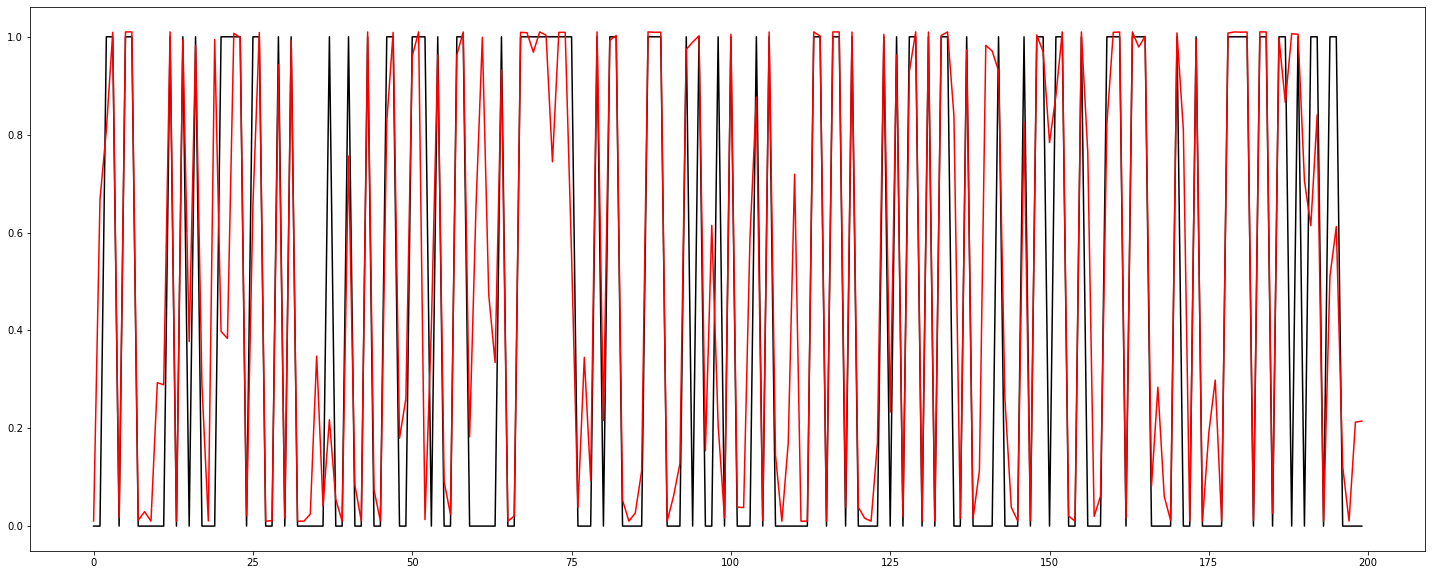

[[0.94382022 0.05617978]
 [0.14414414 0.85585586]]


In [28]:
def plot_im_2(img,img2):
     
    plt.figure(figsize=(25,10))

    plt.plot(img.ravel() ,'k')
    plt.plot(img2.ravel() ,'r')
     
    plt.show()  

dataset1 =DatasetForClassify_01('dataset/test_set/',0) 
dataloader = DataLoader(dataset1, batch_size=200)
l_=dataset1.l_
print(l_)
batch=next(iter(dataloader))
Anchor=batch['Anchor'].numpy() 
predict=TL_001(Anchor)  
label_=batch['label'].numpy()  
plot_im_2(label_,predict+0.01)

i_true_positive=np.where(label_>0.5)[0]
i_true_negative=np.where(label_<0.5)[0]
i_predict_positive=np.where(predict>0.5)[0]
i_predict_negative=np.where(predict<0.5)[0]

true_positive=len(set(i_true_positive)&(set(i_predict_positive)))/len(i_true_positive)
true_negative=len(set(i_true_negative)&(set(i_predict_negative)))/len(i_true_negative)
CFG_mtrx=np.array([[true_positive,1-true_positive],[1-true_negative,true_negative]])
print(CFG_mtrx)

# DOGS

In [29]:
dir_in='dataset/test_set/dogs'
dir_out='dataset/incoming/dogs'
if not os.path.exists(dir_out):
        os.makedirs(dir_out)

def file2tenzor(pimage):
         
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
        try: 
            bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
            if( bw_.shape[0]== -256 ) and (bw_.shape[1]==256) :

                resize_image = self.downscale_2(bw_)
                #resize_image =  bw_ 
            else:
                resize_image = cv2.resize(bw_, (IMAGE_SIZE[0],IMAGE_SIZE[1]), interpolation = cv2.INTER_AREA)


            return resize_image/255

        except:
            print(pimage)
            return None
##########################################
q=os.listdir(dir_in)
l_=len(q)        
if len(q)>20:
     for file in q:        
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            tensor_=file2tenzor(os.path.join(dir_in, file))
            if tensor_ is not None:
                predict=TL_001(np.expand_dims(tensor_,0))
                print('predict:',predict[0,0])
                if predict[0,0] > 0.5:
                    #show_img(tensor_)
                    shutil.copy( os.path.join(dir_in, file) , os.path.join(dir_out, file))
                    print(file)

predict: 0.24470697
predict: 0.9972223
dog.4002.jpg
predict: 0.9999794
dog.4003.jpg
predict: 0.99580896
dog.4004.jpg
predict: 0.7830258
dog.4005.jpg
predict: 0.90120333
dog.4006.jpg
predict: 0.99434495
dog.4007.jpg
predict: 0.99969244
dog.4008.jpg
predict: 1.0
dog.4009.jpg
predict: 0.9137152
dog.4010.jpg
predict: 0.965749
dog.4011.jpg
predict: 0.9704889
dog.4012.jpg
predict: 0.99999785
dog.4013.jpg
predict: 0.99997985
dog.4014.jpg
predict: 0.9998043
dog.4015.jpg
predict: 0.9975109
dog.4016.jpg
predict: 0.9152267
dog.4017.jpg
predict: 0.9998822
dog.4018.jpg
predict: 0.99999833
dog.4019.jpg
predict: 0.97341657
dog.4020.jpg
predict: 0.99671775
dog.4021.jpg
predict: 0.99995935
dog.4022.jpg
predict: 0.52087903
dog.4023.jpg
predict: 0.99338245
dog.4024.jpg
predict: 0.8634021
dog.4025.jpg
predict: 0.2073088
predict: 0.99967766
dog.4027.jpg
predict: 0.98637086
dog.4028.jpg
predict: 0.9999703
dog.4029.jpg
predict: 0.9968368
dog.4030.jpg
predict: 0.9685119
dog.4031.jpg
predict: 0.9997807
dog.403

dog.4267.jpg
predict: 0.9999974
dog.4268.jpg
predict: 0.071851954
predict: 0.99999917
dog.4270.jpg
predict: 0.99994445
dog.4271.jpg
predict: 0.99409
dog.4272.jpg
predict: 0.98503566
dog.4273.jpg
predict: 0.25320998
predict: 0.003118167
predict: 0.99999905
dog.4276.jpg
predict: 0.99996316
dog.4277.jpg
predict: 0.97841144
dog.4278.jpg
predict: 0.99997616
dog.4279.jpg
predict: 0.9717396
dog.4280.jpg
predict: 0.9366112
dog.4281.jpg
predict: 0.98417836
dog.4282.jpg
predict: 0.9986725
dog.4283.jpg
predict: 0.8128928
dog.4284.jpg
predict: 0.99999523
dog.4285.jpg
predict: 0.9368692
dog.4286.jpg
predict: 0.9999999
dog.4287.jpg
predict: 0.9996019
dog.4288.jpg
predict: 0.9999417
dog.4289.jpg
predict: 0.6619724
dog.4290.jpg
predict: 0.9999753
dog.4291.jpg
predict: 0.9709353
dog.4292.jpg
predict: 0.64578277
dog.4293.jpg
predict: 0.9999937
dog.4294.jpg
predict: 0.99819106
dog.4295.jpg
predict: 0.7084202
dog.4296.jpg
predict: 0.6963436
dog.4297.jpg
predict: 0.99193454
dog.4298.jpg
predict: 0.9887306


dog.4539.jpg
predict: 0.9999931
dog.4540.jpg
predict: 0.9997429
dog.4541.jpg
predict: 0.9964238
dog.4542.jpg
predict: 0.99706584
dog.4543.jpg
predict: 0.9999949
dog.4544.jpg
predict: 0.9826171
dog.4545.jpg
predict: 0.9916569
dog.4546.jpg
predict: 0.70301944
dog.4547.jpg
predict: 0.9430856
dog.4548.jpg
predict: 0.9999925
dog.4549.jpg
predict: 0.8654484
dog.4550.jpg
predict: 0.98372155
dog.4551.jpg
predict: 0.9997172
dog.4552.jpg
predict: 0.9970764
dog.4553.jpg
predict: 0.9990246
dog.4554.jpg
predict: 0.9820279
dog.4555.jpg
predict: 0.9997768
dog.4556.jpg
predict: 0.003993805
predict: 0.9534386
dog.4558.jpg
predict: 0.9999974
dog.4559.jpg
predict: 0.9990614
dog.4560.jpg
predict: 0.99971086
dog.4561.jpg
predict: 0.92208534
dog.4562.jpg
predict: 0.9999825
dog.4563.jpg
predict: 0.99721575
dog.4564.jpg
predict: 0.8860966
dog.4565.jpg
predict: 0.9999572
dog.4566.jpg
predict: 0.9996592
dog.4567.jpg
predict: 0.97608644
dog.4568.jpg
predict: 0.99948007
dog.4569.jpg
predict: 0.99994934
dog.4570.j

dog.4812.jpg
predict: 0.9993839
dog.4813.jpg
predict: 0.0031275726
predict: 0.9996538
dog.4815.jpg
predict: 0.99851435
dog.4816.jpg
predict: 0.9930997
dog.4817.jpg
predict: 0.99996626
dog.4818.jpg
predict: 0.9990251
dog.4819.jpg
predict: 0.0038962434
predict: 0.6554036
dog.4821.jpg
predict: 0.9730978
dog.4822.jpg
predict: 0.9990891
dog.4823.jpg
predict: 0.611617
dog.4824.jpg
predict: 0.998906
dog.4825.jpg
predict: 0.99995244
dog.4826.jpg
predict: 0.99698985
dog.4827.jpg
predict: 0.98290825
dog.4828.jpg
predict: 0.99885786
dog.4829.jpg
predict: 0.9540816
dog.4830.jpg
predict: 0.9980385
dog.4831.jpg
predict: 0.9994729
dog.4832.jpg
predict: 0.99504083
dog.4833.jpg
predict: 0.95670897
dog.4834.jpg
predict: 0.9999994
dog.4835.jpg
predict: 0.99961025
dog.4836.jpg
predict: 0.97427815
dog.4837.jpg
predict: 0.9826879
dog.4838.jpg
predict: 0.97445434
dog.4839.jpg
predict: 1.0
dog.4840.jpg
predict: 0.9951397
dog.4841.jpg
predict: 0.9931465
dog.4842.jpg
predict: 0.99992335
dog.4843.jpg
predict: 0.

# CATS

In [30]:
dir_in='dataset/test_set/cats'
dir_out='dataset/incoming/cats'
if not os.path.exists(dir_out):
        os.makedirs(dir_out)

def file2tenzor(pimage):
         
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
        try: 
            bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
            if( bw_.shape[0]== -256 ) and (bw_.shape[1]==256) :

                resize_image = self.downscale_2(bw_)
                #resize_image =  bw_ 
            else:
                resize_image = cv2.resize(bw_, (IMAGE_SIZE[0],IMAGE_SIZE[1]), interpolation = cv2.INTER_AREA)


            return resize_image/255

        except:
            print(pimage)
            return None
##########################################
q=os.listdir(dir_in)
l_=len(q)        
if len(q)>20:
     for file in q:        
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            tensor_=file2tenzor(os.path.join(dir_in, file))
            if tensor_ is not None:
                predict=TL_001(np.expand_dims(tensor_,0))
                print('predict:',predict[0,0])
                if predict[0,0] <0.5:
                    #show_img(tensor_)
                    shutil.copy( os.path.join(dir_in, file) , os.path.join(dir_out, file) )
                    print(file)

predict: 0.12901416
cat.4001.jpg
predict: 0.019016204
cat.4002.jpg
predict: 0.0002385972
cat.4003.jpg
predict: 0.0023381717
cat.4004.jpg
predict: 0.0005541698
cat.4005.jpg
predict: 0.21534854
cat.4006.jpg
predict: 0.14629407
cat.4007.jpg
predict: 0.01462291
cat.4008.jpg
predict: 0.11904783
cat.4009.jpg
predict: 0.057268854
cat.4010.jpg
predict: 0.05456271
cat.4011.jpg
predict: 0.0890537
cat.4012.jpg
predict: 0.0005844118
cat.4013.jpg
predict: 0.0026752949
cat.4014.jpg
predict: 0.14417033
cat.4015.jpg
predict: 0.00558553
cat.4016.jpg
predict: 0.03082077
cat.4017.jpg
predict: 0.0015377977
cat.4018.jpg
predict: 6.491976e-08
cat.4019.jpg
predict: 0.03842603
cat.4020.jpg
predict: 0.04842238
cat.4021.jpg
predict: 0.020734457
cat.4022.jpg
predict: 0.0017310837
cat.4023.jpg
predict: 0.0014406316
cat.4024.jpg
predict: 0.0017276724
cat.4025.jpg
predict: 0.11652419
cat.4026.jpg
predict: 0.010654747
cat.4027.jpg
predict: 0.028431015
cat.4028.jpg
predict: 0.030755816
cat.4029.jpg
predict: 0.1304318

predict: 0.36765218
cat.4254.jpg
predict: 2.5138852e-06
cat.4255.jpg
predict: 0.69685686
predict: 0.38849697
cat.4257.jpg
predict: 0.036208857
cat.4258.jpg
predict: 9.150185e-05
cat.4259.jpg
predict: 0.0024705515
cat.4260.jpg
predict: 0.88859546
predict: 0.0023810216
cat.4262.jpg
predict: 0.6256075
predict: 0.04059521
cat.4264.jpg
predict: 0.1694352
cat.4265.jpg
predict: 0.0004090546
cat.4266.jpg
predict: 0.00017765838
cat.4267.jpg
predict: 0.35093492
cat.4268.jpg
predict: 0.0441404
cat.4269.jpg
predict: 0.09553519
cat.4270.jpg
predict: 0.00841283
cat.4271.jpg
predict: 0.2963196
cat.4272.jpg
predict: 0.0508798
cat.4273.jpg
predict: 0.0002788951
cat.4274.jpg
predict: 0.06452658
cat.4275.jpg
predict: 1.9578205e-05
cat.4276.jpg
predict: 0.0014581915
cat.4277.jpg
predict: 0.39122242
cat.4278.jpg
predict: 0.45354167
cat.4279.jpg
predict: 0.1324001
cat.4280.jpg
predict: 0.0086629
cat.4281.jpg
predict: 0.0113470685
cat.4282.jpg
predict: 0.008587868
cat.4283.jpg
predict: 0.1600191
cat.4284.jpg

cat.4506.jpg
predict: 0.0018459916
cat.4507.jpg
predict: 0.008817145
cat.4508.jpg
predict: 0.00050401466
cat.4509.jpg
predict: 0.84064937
predict: 3.186743e-05
cat.4511.jpg
predict: 0.17949118
cat.4512.jpg
predict: 0.010911994
cat.4513.jpg
predict: 0.0014963406
cat.4514.jpg
predict: 1.8290786e-05
cat.4515.jpg
predict: 0.89635706
predict: 0.00055796833
cat.4517.jpg
predict: 0.6406027
predict: 0.0066731875
cat.4519.jpg
predict: 0.23083511
cat.4520.jpg
predict: 0.014859167
cat.4521.jpg
predict: 0.45661443
cat.4522.jpg
predict: 2.3293727e-05
cat.4523.jpg
predict: 0.03965094
cat.4524.jpg
predict: 0.07159113
cat.4525.jpg
predict: 9.612424e-06
cat.4526.jpg
predict: 0.0020428542
cat.4527.jpg
predict: 0.034508858
cat.4528.jpg
predict: 0.0005673454
cat.4529.jpg
predict: 0.0010822378
cat.4530.jpg
predict: 0.036526885
cat.4531.jpg
predict: 8.573592e-05
cat.4532.jpg
predict: 0.0034862044
cat.4533.jpg
predict: 1.9726467e-05
cat.4534.jpg
predict: 0.022316998
cat.4535.jpg
predict: 0.0058385488
cat.453

cat.4758.jpg
predict: 0.20247585
cat.4759.jpg
predict: 2.7854765e-05
cat.4760.jpg
predict: 0.031286966
cat.4761.jpg
predict: 0.1586105
cat.4762.jpg
predict: 0.03400533
cat.4763.jpg
predict: 0.011026646
cat.4764.jpg
predict: 0.46134564
cat.4765.jpg
predict: 0.45855626
cat.4766.jpg
predict: 0.3819421
cat.4767.jpg
predict: 2.6769612e-05
cat.4768.jpg
predict: 0.0012656805
cat.4769.jpg
predict: 0.002084469
cat.4770.jpg
predict: 0.99622774
predict: 0.5916172
predict: 0.018234113
cat.4773.jpg
predict: 0.011087939
cat.4774.jpg
predict: 0.012762138
cat.4775.jpg
predict: 3.000556e-05
cat.4776.jpg
predict: 3.572278e-10
cat.4777.jpg
predict: 0.039464004
cat.4778.jpg
predict: 0.00022485737
cat.4779.jpg
predict: 0.12130257
cat.4780.jpg
predict: 0.11212397
cat.4781.jpg
predict: 0.8987794
predict: 0.142318
cat.4783.jpg
predict: 0.01797683
cat.4784.jpg
predict: 0.44625834
cat.4785.jpg
predict: 0.18125783
cat.4786.jpg
predict: 0.019797092
cat.4787.jpg
predict: 0.014074958
cat.4788.jpg
predict: 0.2217691

# Проверка качества метрики. Сколько фотографий скопировал

In [31]:
dogs_path = "dataset/incoming/dogs"
cats_path = "dataset/incoming/cats"
path = (dogs_path,cats_path)
mectrics = 0
for i in path:
    path, dirs, files = next(os.walk(i))
    file_count = len(files)
    accuracy = file_count/1000
    mectrics += accuracy
mectrics/2

0.907

In [32]:
RESNET 0.982
VGG 0.906
MoBileNet 0.907

SyntaxError: invalid syntax (<ipython-input-32-3e560becf148>, line 1)